In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 20.97,
  'feels_like': 20.97,
  'temp_min': 15.8,
  'temp_max': 25.21,
  'pressure': 1029,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 1.14, 'deg': 281, 'gust': 1.36},
 'clouds': {'all': 59},
 'dt': 1643671710,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1643630333,
  'sunset': 1643666182},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 4 | ponta do sol
Processing Record 3 of Set 4 | priargunsk
Processing Record 4 of Set 4 | san cristobal
Processing Record 5 of Set 4 | kapaa
Processing Record 6 of Set 4 | laguna
Processing Record 7 of Set 4 | coos bay
Processing Record 8 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 4 | lowestoft
Processing Record 10 of Set 4 | bengkulu
Processing Record 11 of Set 4 | hermanus
Processing Record 12 of Set 4 | ribeira grande
Processing Record 13 of Set 4 | atuona
Processing Record 14 of Set 4 | mangrol
Processing Record 15 of Set 4 | saldanha
Processing Record 16 of Set 4 | mattru
Processing Record 17 of Set 4 | busselton
Processing Record 18 of Set 4 | punta arenas
Processing Record 19 of Set 4 | sanmenxia
Processing Record 20 of Set 4 | cape town
Processing Record 21 of Set 4 | orbetello
Processing Record 22 of Set 4 | batagay-alyta
Processing Record 23 of S

Processing Record 40 of Set 7 | vostok
Processing Record 41 of Set 7 | elizabeth city
Processing Record 42 of Set 7 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 7 | suluq
Processing Record 44 of Set 7 | richards bay
Processing Record 45 of Set 7 | coquimbo
Processing Record 46 of Set 7 | kailua
Processing Record 47 of Set 7 | kamenka
Processing Record 48 of Set 7 | saleaula
City not found. Skipping...
Processing Record 49 of Set 7 | mercedes
Processing Record 50 of Set 7 | ostrovnoy
Processing Record 1 of Set 8 | cabra
Processing Record 2 of Set 8 | marzuq
Processing Record 3 of Set 8 | sur
Processing Record 4 of Set 8 | alyangula
Processing Record 5 of Set 8 | iqaluit
Processing Record 6 of Set 8 | mildura
Processing Record 7 of Set 8 | whitianga
Processing Record 8 of Set 8 | cam ranh
Processing Record 9 of Set 8 | turukhansk
Processing Record 10 of Set 8 | kodiak
Processing Record 11 of Set 8 | roverud
Processing Record 12 of Set 8 | angoram
Processing Recor

Processing Record 30 of Set 11 | vila
Processing Record 31 of Set 11 | samfya
Processing Record 32 of Set 11 | makakilo city
Processing Record 33 of Set 11 | nabire
Processing Record 34 of Set 11 | porto santo
Processing Record 35 of Set 11 | saint-augustin
Processing Record 36 of Set 11 | palanga
Processing Record 37 of Set 11 | sobolevo
Processing Record 38 of Set 11 | lillooet
Processing Record 39 of Set 11 | monywa
Processing Record 40 of Set 11 | ponta delgada
Processing Record 41 of Set 11 | thinadhoo
Processing Record 42 of Set 11 | guanay
Processing Record 43 of Set 11 | krasnoselkup
Processing Record 44 of Set 11 | huittinen
Processing Record 45 of Set 11 | puerto escondido
Processing Record 46 of Set 11 | kodinsk
Processing Record 47 of Set 11 | elliot
Processing Record 48 of Set 11 | tagusao
Processing Record 49 of Set 11 | labuhan
Processing Record 50 of Set 11 | karema
Processing Record 1 of Set 12 | antsohihy
Processing Record 2 of Set 12 | statesville
Processing Record 3

Processing Record 17 of Set 15 | talavera de la reina
Processing Record 18 of Set 15 | mountain home
Processing Record 19 of Set 15 | jimo
Processing Record 20 of Set 15 | sangar
Processing Record 21 of Set 15 | shihezi
Processing Record 22 of Set 15 | gap
Processing Record 23 of Set 15 | negombo
Processing Record 24 of Set 15 | ystad
Processing Record 25 of Set 15 | carbonia
Processing Record 26 of Set 15 | boyolangu
Processing Record 27 of Set 15 | antalaha
Processing Record 28 of Set 15 | boyuibe
Processing Record 29 of Set 15 | attawapiskat
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Angoche,61.9500,159.2333,21.24,63,100,27.20,RU,2022-01-31 23:42:00
1,Ponta Do Sol,32.6667,-17.1000,66.00,83,32,12.95,PT,2022-01-31 23:44:38
2,Priargunsk,50.3691,119.1012,-29.15,100,53,0.38,RU,2022-01-31 23:46:02
3,San Cristobal,7.7669,-72.2250,75.38,81,81,2.55,VE,2022-01-31 23:42:24
4,Kapaa,22.0752,-159.3190,76.12,71,0,1.01,US,2022-01-31 23:42:06
5,Laguna,38.4210,-121.4238,64.63,53,0,1.99,US,2022-01-31 23:46:03
6,Coos Bay,43.3665,-124.2179,49.86,90,40,4.61,US,2022-01-31 23:46:03
7,Lowestoft,52.4752,1.7516,38.30,87,25,13.71,GB,2022-01-31 23:46:04
8,Bengkulu,-3.8004,102.2655,75.85,86,100,3.87,ID,2022-01-31 23:45:58
9,Hermanus,-34.4187,19.2345,73.90,88,2,9.01,ZA,2022-01-31 23:46:04


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643678444.4621353

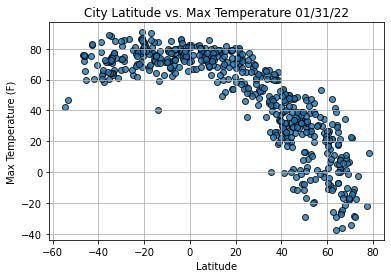

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

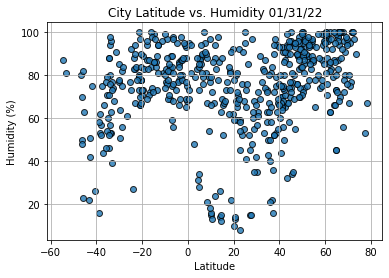

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()